In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import findspark
findspark.init()

import pyspark
from pyspark.sql import *
import pyspark.sql.functions as func
from pyspark.sql.types import *

%run insights.py
%run plot.py

In [2]:
spark = SparkSession.builder.getOrCreate()

In [5]:
# Load all datasets
donald_comments = spark.read.load('../data/donald_comments.parquet')
donald_comments.registerTempTable("donald")
nlp_per_community = spark.read.load('../data/nlp_per_community.parquet')

In [40]:
the_donald_2016 = nlp_per_community[(nlp_per_community['subreddit']=='The_Donald') & (nlp_per_community['creation_date'] > dt.date(2016,1,1))]
the_donald_2016_daily = the_donald_2016.groupby('creation_date').mean().toPandas().set_index('creation_date')
the_donald_2016_daily = pd.concat([the_donald_2016_daily, the_donald_2016.groupby('creation_date').count().toPandas().set_index('creation_date')], axis=1)

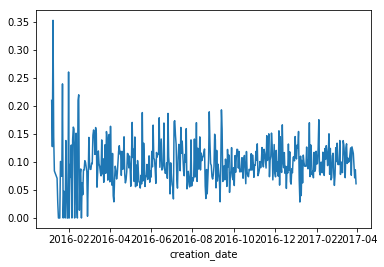

In [41]:
the_donald_2016_daily['avg(Negativity)'].plot.line()

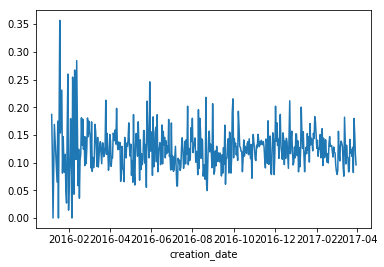

In [21]:
the_donald_2016_daily['avg(Positivity)'].plot.line()

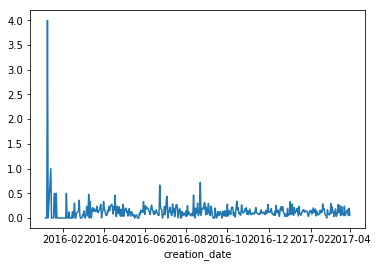

In [22]:
the_donald_2016_daily['avg(Vulgarity)'].plot.line()

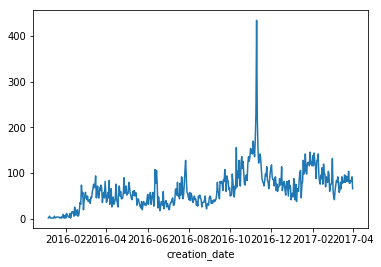

In [42]:
the_donald_2016_daily['count'].plot.line()

In [45]:
hillary_2016 = nlp_per_community[(nlp_per_community['subreddit']=='hillaryclinton') & (nlp_per_community['creation_date'] > dt.date(2016,1,1))]
hillary_2016_daily = hillary_2016.groupby('creation_date').mean().toPandas().set_index('creation_date')
hillary_2016_daily = pd.concat([hillary_2016_daily, hillary_2016.groupby('creation_date').count().toPandas().set_index('creation_date')], axis=1)

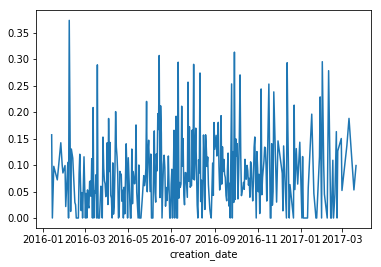

In [31]:
hillary_2016_daily['avg(Negativity)'].plot.line()

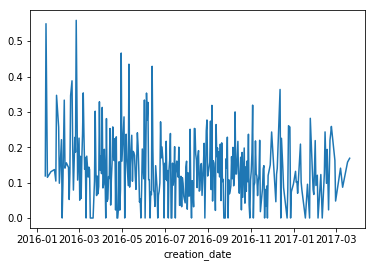

In [32]:
hillary_2016_daily['avg(Positivity)'].plot.line()

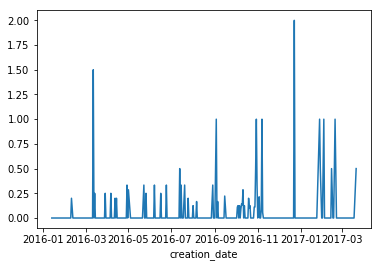

In [38]:
hillary_2016_daily['avg(Vulgarity)'].plot.line()

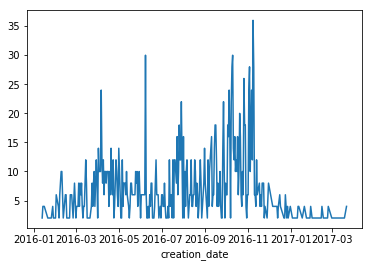

In [46]:
hillary_2016_daily['count'].plot.line()

In [43]:
bernie_2016 = nlp_per_community[(nlp_per_community['subreddit']=='SandersForPresident') & (nlp_per_community['creation_date'] > dt.date(2016,1,1))]
bernie_2016_daily = bernie_2016.groupby('creation_date').mean().toPandas().set_index('creation_date')
bernie_2016_daily = pd.concat([bernie_2016_daily, bernie_2016.groupby('creation_date').count().toPandas().set_index('creation_date')], axis=1)

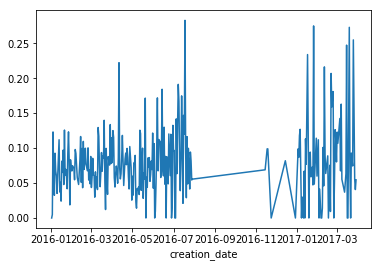

In [35]:
bernie_2016_daily['avg(Negativity)'].plot.line()

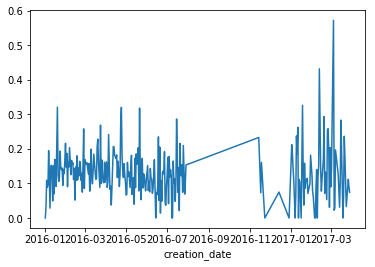

In [36]:
bernie_2016_daily['avg(Positivity)'].plot.line()

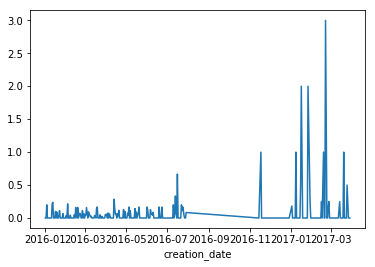

In [37]:
bernie_2016_daily['avg(Vulgarity)'].plot.line()

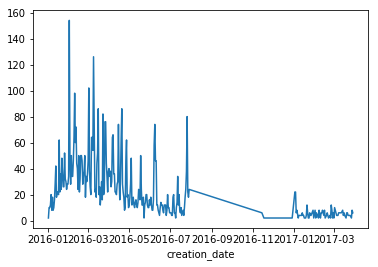

In [44]:
bernie_2016_daily['count'].plot.line()

In [47]:
bernie_2016.count()

6370

In [48]:
hillary_2016.count()

2404

In [49]:
the_donald_2016.count()

28986